# COVID-19 vaccine tweets sentiment classification

## Laura Jaideny Pérez Gómez - A01271904

### CS5056 Data Analytics

# 1. CRISP-DM

For this exercise, we will consider the twitter tweets related to the COVID-19 vaccine topic and apply the CRISP-DM methodology to understand the problem from a business standpoint.

The exercise retrieved the databases from kaggle (https://www.kaggle.com/kaushiksuresh147/covidvaccine-tweets, https://www.kaggle.com/gpreda/all-covid19-vaccines-tweets, https://www.kaggle.com/ritesh2000/covid19-vaccine-tweets). In it, we will explain and analyze the main outcomes of each of the six steps of the CRISP-DM methodology.

CRISP-DM (Cross Industry Standard Process for Data Mining) is the most frequent methodology used by companies for those problems that involve a high amount of data. It is composed of six stages:

1. Business Understanding: It casts the business problem into one or more data science problems that reflect the business need.
2. Data Understanding: It helps to understand the strengths and limitations of the data so that it can be matched with adequate data mining tasks. 
3. Data Preparation: It manipulates and converts the data into forms that produce better results. 
4. Modeling: It develops models that find similarities within the data using data mining techniques. 
5. Evaluation: It assesses the data mining results to make sure they are valid, reliable and that the model satisfies the business goal. 
6. Deployment: It puts the data mining results into the business process.

## Business Understanding

The aim of this research is to classify tweets regarding the COVID-19 vaccines, to predict their sentiment, so they can be classified as positive, neutral, or negative. By doing this, tweets can be analyzed to find out the acceptance of the vaccines in a certain demographic zone. 

## Data Understanding

To better understand the data we will first import those libraries that will be used along the stages of the CRISP-DM methodology.

In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob

import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt

import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import preprocessor as p
from gensim.parsing.preprocessing import remove_stopwords
from PIL import Image
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

nltk.download('punkt')
stop_words = set(stopwords.words('english'))

/opt/anaconda3/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/laurajaideny/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### First dataset

The first dataset is imported and the first five rows are shown (https://www.kaggle.com/kaushiksuresh147/covidvaccine-tweets)

In [2]:
tweets = pd.read_csv("covidvaccine.csv", encoding='latin1')
tweets.tail()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
130143,Leif Pettersen,Minneapolis,"Travel marketing professional, recovering trav...",2008-04-30 15:54:25,11431,838,10316,True,2021-02-11 00:02:00,In this episode @jburcum and I discuss post-va...,NaN,TweetDeck,False
130144,AFSCME Council 28 (WFSE),"Olympia, WA","Washington Federation of State Employees, AFSC...",2008-09-17 13:54:50,1682,563,570,False,2021-02-11 00:01:06,Want to get the #CovidVaccine? Use this tool t...,['CovidVaccine'],Hootsuite Inc.,False
130145,ENTREPRENEURIAL ECOSYSTEM ð ð,"Southern California, USA ðï¸ð","Our MISSION is ""Entrepreneurs helping Other En...",2018-02-24 00:55:35,7781,4787,4708,False,2021-02-11 00:00:47,California now has most COVID-19 deaths ð¨ð...,NaN,Twitter Web App,False
130146,PlacerCountyMuseums,"Auburn, California",There are 7 museums + Archives and Collections...,2015-02-11 23:27:33,481,454,3512,False,2021-02-11 00:00:01,From our Collection: Hoop Tongs\n\nc. 1900\n\n...,"['COVID19', 'COVIDVaccine']",Twitter Web App,False
130147,On Top Magazine,United States,America's fastest growing #LGBT news site. Joi...,2010-01-27 05:23:15,4959,5346,2653,False,2021-02-11 00:00:00,Iranian Cleric: COVID-19 Vaccine Turns People ...,"['LGBT', 'homophobia', 'Iran', 'covid19', 'cov...",Twitter for Advertisers (legacy),False


A text cleaning need to be applied as a tweet may contain: URLs, mentions, hashtags, emojis, specific words, etc. 

In [3]:
def preprocessTweets(tweet):
    text = p.clean(tweet)
    return text

tweets['text'] = tweets['text'].apply(preprocessTweets)

tweets.shape

(130148, 13)

Additional text preprocessing needs to be applied for lowercasing, punctuation removal, remove extra white spaces, and stopwords removal.

In [4]:
def stopwordRemoval(tweet):
    text = remove_stopwords(tweet)
    return text

tweets['text'] = tweets['text'].apply(stopwordRemoval)

In [5]:
tweets['text'] = tweets['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
tweets.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64,11,110,False,18-08-2020 12:55,australia manufacture covid 19 vaccine citizen...,['CovidVaccine'],Twitter Web App,False
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1,17,0,False,18-08-2020 12:55,australia good,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143,566,8,False,18-08-2020 12:46,deaths covid 19 affected countriesread more,NaN,Twitter Web App,False
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29,25,620,False,18-08-2020 12:45,stay safe di amp da,NaN,Twitter for Android,False
4,Ann-Maree OâConnor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83,497,10737,False,18-08-2020 12:45,this passes leadership country voucher w,NaN,Twitter Web App,False


TextBlob library was used to obtain a metric of the polarity of a tweet text. The polarity value will be between -1 and 1, where 1 means a positive sentence and -1 a negative one.

In [6]:
def getSentimentPolarity(dataframe, text):
    return dataframe[text].map(lambda txt: TextBlob(txt).sentiment.polarity)

tweets['sentiment'] = getSentimentPolarity(tweets, 'text')
tweets.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64,11,110,False,18-08-2020 12:55,australia manufacture covid 19 vaccine citizen...,['CovidVaccine'],Twitter Web App,False,0.4
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1,17,0,False,18-08-2020 12:55,australia good,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False,0.7
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143,566,8,False,18-08-2020 12:46,deaths covid 19 affected countriesread more,NaN,Twitter Web App,False,0.5
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29,25,620,False,18-08-2020 12:45,stay safe di amp da,NaN,Twitter for Android,False,0.5
4,Ann-Maree OâConnor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83,497,10737,False,18-08-2020 12:45,this passes leadership country voucher w,NaN,Twitter Web App,False,0.0


Finally, the polarity is labeled to have an integer value, 0 for a neutral text, 1 for a positive text, and -1 for a negative text.

In [7]:
def labelData(dataframe):
    if dataframe['sentiment'] == 0.0:
        return 0
    elif dataframe['sentiment'] > 0.0:
        return 1
    else:
        return -1
    
tweets['label'] = tweets.apply(labelData, axis=1)
tweets.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment,label
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64,11,110,False,18-08-2020 12:55,australia manufacture covid 19 vaccine citizen...,['CovidVaccine'],Twitter Web App,False,0.4,1
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1,17,0,False,18-08-2020 12:55,australia good,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False,0.7,1
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143,566,8,False,18-08-2020 12:46,deaths covid 19 affected countriesread more,NaN,Twitter Web App,False,0.5,1
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29,25,620,False,18-08-2020 12:45,stay safe di amp da,NaN,Twitter for Android,False,0.5,1
4,Ann-Maree OâConnor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83,497,10737,False,18-08-2020 12:45,this passes leadership country voucher w,NaN,Twitter Web App,False,0.0,0


No relevant columns were removed.

In [8]:
def removeColumns(dataframe, columns):
    for col in columns:
        del dataframe[col]
    return dataframe

ntweets = removeColumns(tweets, ['user_name', 'user_description', 'user_created',
                                          'user_followers', 'user_friends', 'user_favourites', 'user_verified', 
                                          'date', 'hashtags', 'source', 'is_retweet', 'sentiment'])
ntweets.head()
nationdf = ntweets.copy()

In [9]:
ntweets = removeColumns(tweets, ['user_location'])
ntweets

,text,label
0,australia manufacture covid 19 vaccine citizen...,1
1,australia good,1
2,deaths covid 19 affected countriesread more,1
3,stay safe di amp da,1
4,this passes leadership country voucher w,0
...,...,...
130143,in episode i discuss post vaccine life any cov...,0
130144,want use tool confirm eligibility locations,0
130145,california covid 19 deaths ca deaths m active ...,-1
130146,from collection hoop tongsc,0


<AxesSubplot:xlabel='label', ylabel='count'>

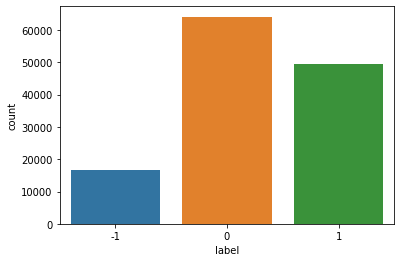

In [10]:
sns.countplot(x='label', data = ntweets)

In [11]:
ntweets.groupby('label').count()

,text
label,
-1,16531
0,64135
1,49482


###  Second dataset

The second dataset is imported and the first five rows are shown (https://www.kaggle.com/gpreda/all-covid19-vaccines-tweets )

In [12]:
tweets2 = pd.read_csv("vaccination_all_tweets.csv", encoding='latin1')
tweets2.tail()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
78314,1392826970979799041,yash,New Delhi,I exist here because democracy dies in darkness.,2017-09-22 04:42:00,146,850,321,False,2021-05-13 13:00:02,#SputnikV will be available in India from next...,"['SputnikV', 'BreakingNews']",Twitter for Android,0,0,False
78315,1392826919016488961,Global Tribune,New Delhi,India's Fearless National Mind,2020-02-22 06:35:12,60,8,15,False,2021-05-13 12:59:49,Sputnik V Could Be Available In Market From Ne...,"['SputnikV', 'vaccine', 'vaccination', 'NitiAa...",Twitter for Android,0,0,False
78316,1392826804004548614,NewsMeter,NaN,"NewsMeter, an Independent digital media platfo...",2019-07-25 11:10:46,6461,21,301,True,2021-05-13 12:59:22,Sputnik V vaccine to be available in market by...,"['SputnikV', 'Vaccines', 'COVID19', 'Vaccinesi...",Hocalwire Social Share,0,5,False
78317,1392826283608875012,Russian Embassy in Sri Lanka,Colombo,Embassy of the Russian Federationð·ðº in S...,2011-08-01 00:55:43,4991,500,1617,True,2021-05-13 12:57:18,âï¸The Food and Drug Authority of the Repub...,"['Maldives', 'Russian', 'SputnikV', 'COVID19']",Twitter Web App,2,6,False
78318,1392825939097096193,ABP LIVE,New Delhi,Follow for Breaking News and à¤ à¤¨CUT videos ...,2011-07-12 07:23:31,1768164,10,163,False,2021-05-13 12:55:55,"Russia's #SputnikV Vaccine Ready For Rollout, ...",['SputnikV'],TweetDeck,5,56,False


Data preprocessing and preparation is applied using the same procedures applied for the first database.

In [13]:
tweets2['text'] = tweets2['text'].apply(preprocessTweets)
tweets2.shape

(78319, 16)

In [14]:
def stopwordRemoval(tweet):
    text = remove_stopwords(tweet)
    return text

tweets2['text'] = tweets2['text'].apply(stopwordRemoval)

In [15]:
tweets2['text'] = tweets2['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
tweets2.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,same folks said daikon paste treat cytokine storm,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,while world wrong history year hopefully bigge...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,elið±ð¹ðªðºð,Your Bed,"heil, hydra ðâº",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,russian vaccine created 4 years,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,facts immutable senator you re ethically sturd...,NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,explain need vaccine,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [16]:
def getSentimentPolarity(dataframe, text):
    return dataframe[text].map(lambda txt: TextBlob(txt).sentiment.polarity)

tweets2['sentiment'] = getSentimentPolarity(tweets2, 'text')
tweets2.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,same folks said daikon paste treat cytokine storm,['PfizerBioNTech'],Twitter for Android,0,0,False,0.0
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,while world wrong history year hopefully bigge...,NaN,Twitter Web App,1,1,False,-0.5
2,1337858199140118533,elið±ð¹ðªðºð,Your Bed,"heil, hydra ðâº",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,russian vaccine created 4 years,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,0.0
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,facts immutable senator you re ethically sturd...,NaN,Twitter Web App,446,2129,False,0.2
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,explain need vaccine,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,0.0


In [17]:
def labelData(dataframe):
    if dataframe['sentiment'] == 0.0:
        return 0
    elif dataframe['sentiment'] > 0.0:
        return 1
    else:
        return -1
    
tweets2['label'] = tweets2.apply(labelData, axis=1)
tweets2.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,sentiment,label
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,same folks said daikon paste treat cytokine storm,['PfizerBioNTech'],Twitter for Android,0,0,False,0.0,0
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,while world wrong history year hopefully bigge...,NaN,Twitter Web App,1,1,False,-0.5,-1
2,1337858199140118533,elið±ð¹ðªðºð,Your Bed,"heil, hydra ðâº",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,russian vaccine created 4 years,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,0.0,0
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,facts immutable senator you re ethically sturd...,NaN,Twitter Web App,446,2129,False,0.2,1
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,explain need vaccine,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,0.0,0


In [18]:
def removeColumns(dataframe, columns):
    for col in columns:
        del dataframe[col]
    return dataframe

ntweets2 = removeColumns(tweets2, ['id','user_location','user_name', 'user_description', 'user_created',
                                          'user_followers', 'user_friends', 'user_favourites', 'user_verified', 
                                          'date', 'hashtags', 'source', 'is_retweet', 'sentiment','retweets','favorites'])
ntweets2.head()

,text,label
0,same folks said daikon paste treat cytokine storm,0
1,while world wrong history year hopefully bigge...,-1
2,russian vaccine created 4 years,0
3,facts immutable senator you re ethically sturd...,1
4,explain need vaccine,0


<AxesSubplot:xlabel='label', ylabel='count'>

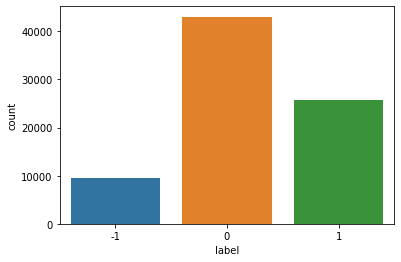

In [19]:
sns.countplot(x='label', data = ntweets2)

In [20]:
ntweets2.groupby('label').count()

,text
label,
-1,9488
0,43019
1,25812


Finally, to build a balanced dataset, only the negative labeled tweets are kept.

In [21]:
ndf = ntweets2[ntweets2['label'] == -1]
ndf

,text,label
1,while world wrong history year hopefully bigge...,-1
6,bit sad claim fame success patriotic competiti...,-1
18,rake billions expensive refuses cut price lowe,-1
19,the trump administration failed deliver vaccin...,-1
24,presenting medical news advancement past week ...,-1
...,...,...
78237,millions people dead end and finished end,-1
78292,do present work present double strain formulat...,-1
78294,though created august account wasnt active nov...,-1
78297,conversely quick point concerns western vaccin...,-1


### Third dataset

The second dataset is imported and the first five rows are shown (https://www.kaggle.com/ritesh2000/covid19-vaccine-tweets)

In [22]:
tweets3 = pd.read_csv("file.csv", encoding='latin1')
tweets3.tail()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
209924,1227994124709744640,1227984370469933057,2020-02-13 22:03:09 India Standard Time,2020-02-13,22:03:09,530,312071365,derek_linders,Derek Linders,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '299273962', 'username': 'Laurie_G...",NaN,NaN,NaN,NaN
209925,1227936762280005632,1227935124924358656,2020-02-13 18:15:12 India Standard Time,2020-02-13,18:15:12,530,43176483,allnbowtane,Thinking Out Loud,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '580312540', 'username': 'girlsrea...",NaN,NaN,NaN,NaN
209926,1227604213880041474,1227555942889209856,2020-02-12 20:13:47 India Standard Time,2020-02-12,20:13:47,530,53561335,leighnapier,Qp,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '53561335', 'username': 'LeighNapi...",NaN,NaN,NaN,NaN
209927,1227437428811739145,1227437428811739145,2020-02-12 09:11:02 India Standard Time,2020-02-12,09:11:02,530,724893933621403648,p_anatacio,Pilosopo Anatacio,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
209928,1227373636484550658,1227368264373653505,2020-02-12 04:57:33 India Standard Time,2020-02-12,04:57:33,530,281855106,trudge1620,DankPlayz,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '16906660', 'username': 'Grummz'}",NaN,NaN,NaN,NaN


As this dataset contains tweets in different languages, only the ones written in english are kept.

In [23]:
tweets3 = tweets3[tweets3['language']=='en'].reset_index()
tweets3.tail()

,index,id,conversation_id,created_at,date,time,timezone,user_id,username,name,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
201025,209924,1227994124709744640,1227984370469933057,2020-02-13 22:03:09 India Standard Time,2020-02-13,22:03:09,530,312071365,derek_linders,Derek Linders,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '299273962', 'username': 'Laurie_G...",NaN,NaN,NaN,NaN
201026,209925,1227936762280005632,1227935124924358656,2020-02-13 18:15:12 India Standard Time,2020-02-13,18:15:12,530,43176483,allnbowtane,Thinking Out Loud,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '580312540', 'username': 'girlsrea...",NaN,NaN,NaN,NaN
201027,209926,1227604213880041474,1227555942889209856,2020-02-12 20:13:47 India Standard Time,2020-02-12,20:13:47,530,53561335,leighnapier,Qp,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '53561335', 'username': 'LeighNapi...",NaN,NaN,NaN,NaN
201028,209927,1227437428811739145,1227437428811739145,2020-02-12 09:11:02 India Standard Time,2020-02-12,09:11:02,530,724893933621403648,p_anatacio,Pilosopo Anatacio,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
201029,209928,1227373636484550658,1227368264373653505,2020-02-12 04:57:33 India Standard Time,2020-02-12,04:57:33,530,281855106,trudge1620,DankPlayz,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '16906660', 'username': 'Grummz'}",NaN,NaN,NaN,NaN


Data preprocessing and preparation is applied using the same procedures applied for the first database.

In [24]:
def preprocessTweets(tweet):
    text = p.clean(tweet)
    return text

tweets3['tweet'] = tweets3['tweet'].apply(preprocessTweets)

tweets3.shape

(201030, 37)

In [25]:
def stopwordRemoval(tweet):
    text = remove_stopwords(tweet)
    return text

tweets3['tweet'] = tweets3['tweet'].apply(stopwordRemoval)

In [26]:
tweets3['tweet'] = tweets3['tweet'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
tweets3.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,index,id,conversation_id,created_at,date,time,timezone,user_id,username,name,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,1319174447442448384,1319153697406906369,2020-10-22 12:41:12 India Standard Time,2020-10-22,12:41:12,530,270371054,to_fly_to_live,Flynn Rider,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '355989081', 'username': 'ANI'}",NaN,NaN,NaN,NaN
1,1,1319174381503852544,1319174381503852544,2020-10-22 12:40:56 India Standard Time,2020-10-22,12:40:56,530,864189073858084864,utkarshsinha07,Utkarsh Sinha,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
2,3,1319174091232833536,1319172728851591174,2020-10-22 12:39:47 India Standard Time,2020-10-22,12:39:47,530,1249338116,bak_sahil,sahil,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '1105377223', 'username': 'MisseeM...",NaN,NaN,NaN,NaN
3,4,1319174029488476160,1319174029488476160,2020-10-22 12:39:32 India Standard Time,2020-10-22,12:39:32,530,804225890062319617,ivibhatweedy,ð¯ð¢ðð¬ | ðº,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
4,5,1319173971636609025,1319173971636609025,2020-10-22 12:39:18 India Standard Time,2020-10-22,12:39:18,530,712681200,paulwatson72,Paul Watson,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN


In [27]:
def getSentimentPolarity(dataframe, text):
    return dataframe[text].map(lambda txt: TextBlob(txt).sentiment.polarity)

tweets3['sentiment'] = getSentimentPolarity(tweets3, 'tweet')
tweets3.head()

,index,id,conversation_id,created_at,date,time,timezone,user_id,username,name,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,sentiment
0,0,1319174447442448384,1319153697406906369,2020-10-22 12:41:12 India Standard Time,2020-10-22,12:41:12,530,270371054,to_fly_to_live,Flynn Rider,...,NaN,NaN,NaN,NaN,"{'user_id': '355989081', 'username': 'ANI'}",NaN,NaN,NaN,NaN,0.362500
1,1,1319174381503852544,1319174381503852544,2020-10-22 12:40:56 India Standard Time,2020-10-22,12:40:56,530,864189073858084864,utkarshsinha07,Utkarsh Sinha,...,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,0.000000
2,3,1319174091232833536,1319172728851591174,2020-10-22 12:39:47 India Standard Time,2020-10-22,12:39:47,530,1249338116,bak_sahil,sahil,...,NaN,NaN,NaN,NaN,"{'user_id': '1105377223', 'username': 'MisseeM...",NaN,NaN,NaN,NaN,0.378788
3,4,1319174029488476160,1319174029488476160,2020-10-22 12:39:32 India Standard Time,2020-10-22,12:39:32,530,804225890062319617,ivibhatweedy,ð¯ð¢ðð¬ | ðº,...,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,0.400000
4,5,1319173971636609025,1319173971636609025,2020-10-22 12:39:18 India Standard Time,2020-10-22,12:39:18,530,712681200,paulwatson72,Paul Watson,...,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,0.000000


In [28]:
def labelData(dataframe):
    if dataframe['sentiment'] == 0.0:
        return 0
    elif dataframe['sentiment'] > 0.0:
        return 1
    else:
        return -1
    
tweets3['label'] = tweets3.apply(labelData, axis=1)
tweets3.head()

,index,id,conversation_id,created_at,date,time,timezone,user_id,username,name,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,sentiment,label
0,0,1319174447442448384,1319153697406906369,2020-10-22 12:41:12 India Standard Time,2020-10-22,12:41:12,530,270371054,to_fly_to_live,Flynn Rider,...,NaN,NaN,NaN,"{'user_id': '355989081', 'username': 'ANI'}",NaN,NaN,NaN,NaN,0.362500,1
1,1,1319174381503852544,1319174381503852544,2020-10-22 12:40:56 India Standard Time,2020-10-22,12:40:56,530,864189073858084864,utkarshsinha07,Utkarsh Sinha,...,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,0.000000,0
2,3,1319174091232833536,1319172728851591174,2020-10-22 12:39:47 India Standard Time,2020-10-22,12:39:47,530,1249338116,bak_sahil,sahil,...,NaN,NaN,NaN,"{'user_id': '1105377223', 'username': 'MisseeM...",NaN,NaN,NaN,NaN,0.378788,1
3,4,1319174029488476160,1319174029488476160,2020-10-22 12:39:32 India Standard Time,2020-10-22,12:39:32,530,804225890062319617,ivibhatweedy,ð¯ð¢ðð¬ | ðº,...,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,0.400000,1
4,5,1319173971636609025,1319173971636609025,2020-10-22 12:39:18 India Standard Time,2020-10-22,12:39:18,530,712681200,paulwatson72,Paul Watson,...,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,0.000000,0


In [29]:
def removeColumns(dataframe, columns):
    for col in columns:
        del dataframe[col]
    return dataframe

ntweets3 = removeColumns(tweets3, ['index','place','id','conversation_id','created_at','date','time','timezone','user_id','username',
                                   'name','language','mentions','urls','photos','replies_count','retweets_count',
                                   'likes_count','hashtags','cashtags','link','retweet','quote_url','video','thumbnail',
                                  'near','geo','source','user_rt_id','user_rt','retweet_id','reply_to','retweet_date',
                                  'translate','trans_src','trans_dest','sentiment'])
ntweets3.head()

,tweet,label
0,isn t best poll promise ever free covid vaccin...,1
1,now states shall wait thier vidhan sabha elect...,0
2,they said vaccine when free covid vaccine new ...,1
3,bjp presenting free covid vaccine state manife...,1
4,another dose daily miserablism planet grauniad...,0


<AxesSubplot:xlabel='label', ylabel='count'>

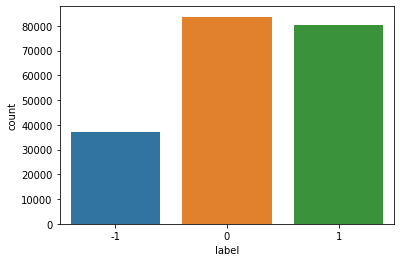

In [30]:
sns.countplot(x='label', data = ntweets3)

In [31]:
ntweets3.groupby('label').count()

,tweet
label,
-1,37119
0,83681
1,80230


Finally, to build a balanced dataset, only the negative labeled tweets are kept.

In [32]:
ndf2 = ntweets3[ntweets3['label'] == -1]
ndf2 = ndf2.rename(columns={'tweet': 'text'})
ndf2

,text,label
24,hope court report making delivery core respons...,-1
30,wtf free covid vaccine are fkng kidding,-1
32,if you re pinning hopes covid vaccine here s d...,-1
39,poor they resort covid vaccine,-1
42,astrazeneca j amp j resume covid vaccine trial...,-1
...,...,...
201011,development covid vaccine needed no rate cuts ...,-1
201015,covid vaccine trial late april,-1
201020,and years batshit crazy conspiracy theorists t...,-1
201025,plenty companies chasing heat making crazy cla...,-1


## Final dataset

The final dataset is built by concatenating the first dataset, and the negative labeled tweets from the second and third datasets.

In [33]:
frames = [tweets, ndf, ndf2]
finalData = pd.concat(frames).reset_index()

In [34]:
finalData2 = removeColumns(finalData, ['index'])
finalData2

,text,label
0,australia manufacture covid 19 vaccine citizen...,1
1,australia good,1
2,deaths covid 19 affected countriesread more,1
3,stay safe di amp da,1
4,this passes leadership country voucher w,0
...,...,...
176750,development covid vaccine needed no rate cuts ...,-1
176751,covid vaccine trial late april,-1
176752,and years batshit crazy conspiracy theorists t...,-1
176753,plenty companies chasing heat making crazy cla...,-1


In [35]:
finalData2.drop_duplicates()
finalData2.shape

(176755, 2)

Text(0.5, 0, 'Sentiment')

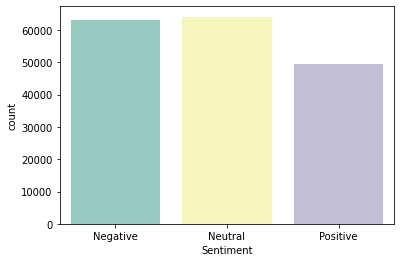

In [36]:
ax = sns.countplot(x='label', data = finalData2, palette="Set3")
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
plt.xlabel('Sentiment')

In [37]:
finalData2.groupby('label').count()

,text
label,
-1,63138
0,64135
1,49482


### Word cloud

Finally, a word cloud is built as a visualization of the top 200 more frequent words on the tweets.

In [38]:
raw_string = []
raw_string = ''.join(finalData2['text'])
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)
words = no_special_characters.split(" ")
words = [w for w in words if len(w) > 2]
words = [w.lower() for w in words]
words = [w for w in words if w not in stop_words]

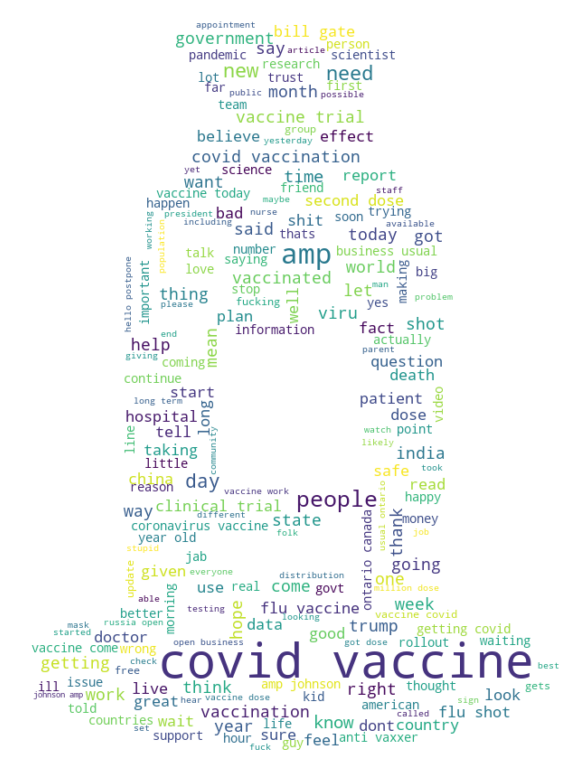

In [39]:
mask = np.array(Image.open('/Users/LauraJaideny/Downloads/vaccinedraw.jpeg'))
wc = WordCloud(background_color="white", max_words=200, mask=mask)
clean_string = ','.join(words)
wc.generate(clean_string)

f = plt.figure(figsize=(14,14))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Data Preparation

We do have a target variable label so classification can be made using a supervised learning method. First, we need to prepare the data by separating the target variable and the rest of the variables.

Therefore, before going to the next CRISP-DM stage, we need to consider that we have to measure the accuracy rate in the modeling step. Thus, the data set has to be divided into a test set (25% of the data) and a train set (75% of the data).

In [40]:
def vectorizeFeature(train_fit):
    vector = TfidfVectorizer(sublinear_tf = True)
    vector.fit(train_fit)
    return vector

vectorizer = vectorizeFeature(np.array(finalData2.iloc[:, 0]))
X = vectorizer.transform(np.array(finalData2.iloc[:, 0]))
y = np.array(finalData2.iloc[:, 1])
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

pd.DataFrame({"Train Row Count":[x_train.shape[0],y_train.shape[0]],
              "Test Row Count":[x_test.shape[0],y_test.shape[0]]},
             index=["X (Predictors)","Y (Target)"])

,Train Row Count,Test Row Count
X (Predictors),141404,35351
Y (Target),141404,35351


In [41]:
neg = 0
pos = 0
neu = 0

for y in y_test:
    if y == -1:
        neg = neg+1
    elif y == 0:
        neu = neu+1
    else:
        pos = pos+1

print(neu)

12877


## Modeling

### Sentiment Analysis by Nation

A first approach was used to classify the labeled tweets in accordance to the country from which they were tweeted. For this, the tweets from the first database were used since they contained the attribute corresponding to the place of origin of the tweet.

In [42]:
locs = nationdf['user_location'].value_counts()
locs[locs>=500]

India                      2465
London, England            1876
United States              1871
London                     1519
United Kingdom             1085
Washington, DC              945
New Delhi, India            934
New York, NY                835
U.S.A.                      794
Los Angeles, CA             727
UK                          724
England, United Kingdom     713
Chicago, IL                 684
Boston, MA                  652
USA                         640
Mumbai, India               610
Houston, TX                 566
London, UK                  513
Canada                      501
Name: user_location, dtype: int64

It was observed that the place of origin of the tweets was not uniform, that is, some contained only the name of the country of origin, others the city and others a region. Therefore, those tweets from places with more than 500 publications were selected, and then the place of origin was modified so that the selected tweets only had the name of the country of origin, with the exception of United Kingdom whose tweets were maintained with the region as place of origin.

In [43]:
mapping = {'London, England': 'England', 'Washington, DC': 'United States', 'London': 'England', 'New Delhi, India': 'India',
          'New York, NY': 'United States', 'U.S.A.': 'United States', 'Los Angeles, CA': 'United States',
          'UK': 'United Kingdom', 'England, United Kingdom': 'England', 'Chicago, IL': 'United States',
          'Boston, MA': 'United States', 'USA': 'United States', 'Mumbai, India': 'India', 'Houston, TX': 'United States',
          'London, UK': 'England'}

In [44]:
nationdf['user_location'] =  nationdf['user_location'].apply(lambda x: mapping[x] if x in mapping.keys() else x)

In [45]:
locs = nationdf['user_location'].value_counts()
locs[locs>=500]

United States     7714
England           4999
India             4009
United Kingdom    1809
Canada             501
Name: user_location, dtype: int64

At the end, only five places were considered: United States, England, India, United Kingdom, and Canada.

In [46]:
indexNames = nationdf[(nationdf['user_location'] != 'United States') & (nationdf['user_location'] != 'England')
                     & (nationdf['user_location'] != 'India') & (nationdf['user_location'] != 'United Kingdom')
                     & (nationdf['user_location'] != 'Canada')].index
nationdf.drop(indexNames, inplace=True)
nationdf.reset_index()

,index,user_location,text,label
0,10,India,biocon executive chairperson kiran mazumdar sh...,0
1,24,India,study shows seroprevalence antibodies samples,0
2,25,India,featured me today for being awarded by the pre...,0
3,34,India,a single vaccination chadox1 ncov 19 induced ...,-1
4,46,United States,just clear i feel,1
...,...,...,...,...
19027,130105,United States,doesnt mean vaccinated people spread disease n...,-1
19028,130131,United States,the covid 19 mrna vaccines success nanomedicin...,1
19029,130135,England,i agree didn t hurt and fast,1
19030,130140,United States,saw people struggling l a countys website regi...,0


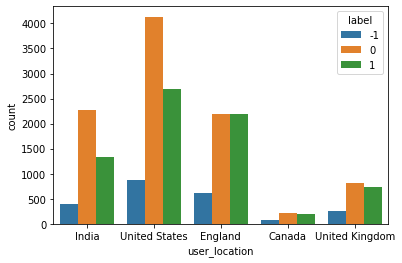

In [47]:
sns.countplot(x='user_location', hue='label', data=nationdf)

plt.show()

Finally, a visualization with the percentages of positive, negative and neutral tweets in each of the places considered was built.

Text(0.5, 21.706249999999983, 'User Location')

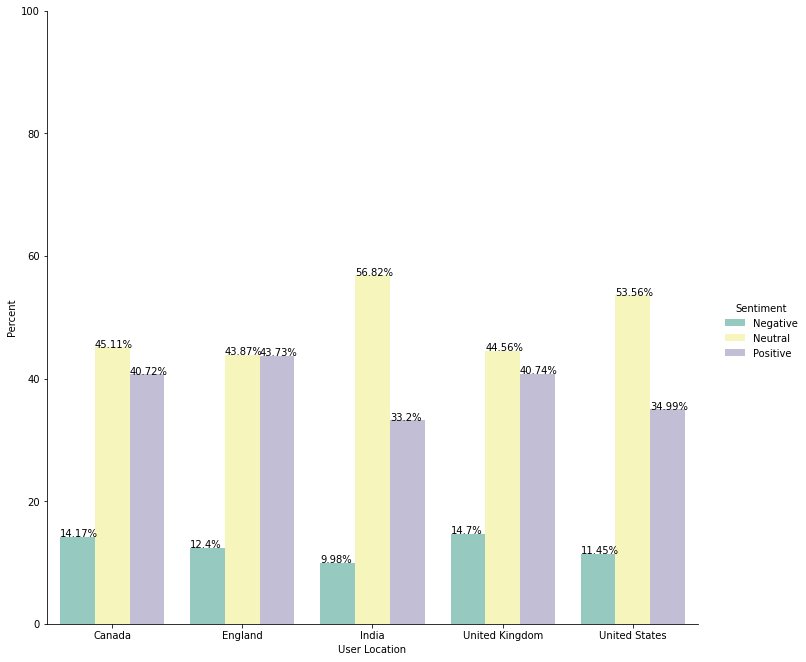

In [48]:
x, y = 'user_location', 'label'

df1 = nationdf.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percent').reset_index()

g = sns.catplot(x=x,y='Percent',hue=y,kind='bar',data=df1,palette="Set3")
g.ax.set_ylim(0,100)
g.fig.set_figwidth(12)
g.fig.set_figheight(10)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
legend = g._legend
legend.set_title("Sentiment")
for t, l in zip(legend.texts,("Negative", "Neutral", "Positive")):
    t.set_text(l)
    
plt.xlabel('User Location')

### Classification Algorithms

We are going to use one or more modeling techniques to fulfill the data mining goal. For this stage, we implement four different classifiers techniques: Decision Tree, Logistic Regression, Naive Bayes, and XGBoost.

For each one, the model is build using the training set, and then its accuracy score is calculated using the test set.

### Decision Tree

In [49]:
# Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_dtc = dtc.predict(x_test)

In [50]:
dtc_acc = accuracy_score(y_test,y_pred_dtc)
print(dtc_acc)

0.9330712002489321


In [51]:
y_precision_score_dtc = precision_score(y_test, y_pred_dtc, average='weighted')
print(y_precision_score_dtc)

0.9329695311942716


In [52]:
y_f1_score_dtc = f1_score(y_test, y_pred_dtc, average='weighted')
print(y_f1_score_dtc)

0.9330088038028287


In [53]:
print('\nConfussion matrix:'),
print(confusion_matrix(y_test,  y_pred_dtc))


Confussion matrix:
[[11526   333   710]
 [  334 12410   133]
 [  611   245  9049]]


### Logistic Regression

In [54]:
# Logistic Regression
logr = LogisticRegression()
logr.fit(x_train,y_train)
y_pred_logr = logr.predict(x_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [55]:
logr_acc = accuracy_score(y_test,y_pred_logr)
print(logr_acc)

0.9534383751520467


In [56]:
y_precision_score_logr = precision_score(y_test, y_pred_logr, average='weighted')
print(y_precision_score_logr)

0.9541296111138907


In [57]:
y_f1_score_logr = f1_score(y_test, y_pred_logr, average='weighted')
print(y_f1_score_logr)

0.9533192350397853


In [58]:
print('\nConfussion matrix:'),
print(confusion_matrix(y_test,  y_pred_logr))


Confussion matrix:
[[11855   436   278]
 [  118 12712    47]
 [  293   474  9138]]


### Naive Bayes

In [59]:
# Naive Bayes
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_pred_mnb = mnb.predict(x_test)

In [60]:
mnb_acc = accuracy_score(y_test,y_pred_mnb)
print(mnb_acc)

0.8270204520381319


In [61]:
y_precision_score_mnb = precision_score(y_test, y_pred_mnb, average='weighted')
print(y_precision_score_mnb)

0.8471231181976906


In [62]:
y_f1_score_mnb = f1_score(y_test, y_pred_mnb, average='weighted')
print(y_f1_score_mnb)

0.8281596011979142


In [63]:
print('\nConfussion matrix:'),
print(confusion_matrix(y_test,  y_pred_mnb))


Confussion matrix:
[[11724   399   446]
 [ 2534  9965   378]
 [ 1973   385  7547]]


### Xgboost Classifier

In [64]:
# Xgboost Classifier
xgboast = xgb.XGBClassifier()
xgboast.fit(x_train, y_train)
xgboast = xgboast.score(x_test,y_test)

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:05:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [65]:
print(xgboast)

0.878192978982207


In [66]:
xgboastc = xgb.XGBClassifier()
xgboastc.fit(x_train, y_train)
predictions = xgboastc.predict(x_test)
print('\nClassification report:')
print(classification_report(y_test, predictions, digits=6))
print('\nConfussion matrix:')
print(confusion_matrix(y_test, predictions))

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:06:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Classification report:
              precision    recall  f1-score   support

          -1   0.928460  0.853926  0.889635     12569
           0   0.800348  0.965675  0.875273     12877
           1   0.954325  0.795255  0.867559      9905

    accuracy                       0.878193     35351
   macro avg   0.894378  0.871619  0.877489     35351
weighted avg   0.889041  0.878193  0.878218     35351


Confussion matrix:
[[10733  1500   336]
 [  401 12435    41]
 [  426  1602  7877]]


### Results

In [67]:
results = pd.DataFrame({"Algorithms":["Decision Tree","Logistic Regression","Naive Bayes","Xgboost Classifier"],
              "Scores":[dtc_acc,logr_acc,mnb_acc,xgboast]})

In [68]:
print(results.sort_values('Scores', ascending=False))

            Algorithms    Scores
1  Logistic Regression  0.953438
0        Decision Tree  0.933071
3   Xgboost Classifier  0.878193
2          Naive Bayes  0.827020


## Evaluation

This stage has the objective of evaluating more carefully the obtained model. This will confirm whether the model appropriately achieves the business goal. 

To better evaluate the models we will use a 10-fold Cross-Validation, which will give us the mean accuracy of each classifier, obtained by resampling the data. 

In [69]:
vectorizer = vectorizeFeature(np.array(finalData2.iloc[:, 0]))
X = vectorizer.transform(np.array(finalData2.iloc[:, 0]))
y = np.array(finalData2.iloc[:, 1])
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

pd.DataFrame({"Train Row Count":[x_train.shape[0],y_train.shape[0]],
              "Test Row Count":[x_test.shape[0],y_test.shape[0]]},
             index=["X (Predictors)","Y (Target)"])

,Train Row Count,Test Row Count
X (Predictors),141404,35351
Y (Target),141404,35351


In [70]:
# Evaluate each model in turning kfold results
results_boxplot = []
names = []
results_mean = []
results_std = []

cv_results = cross_val_score(LogisticRegression(max_iter=1000), X, y, cv=10)
results_boxplot.append(cv_results)
results_mean.append(cv_results.mean())
results_std.append(cv_results.std())
names.append('LR')

In [71]:
cv_results = cross_val_score(DecisionTreeClassifier(), X, y, cv=10)
results_boxplot.append(cv_results)
results_mean.append(cv_results.mean())
results_std.append(cv_results.std())
names.append('DT')

In [72]:
cv_results = cross_val_score(MultinomialNB(), X, y, cv=10)
results_boxplot.append(cv_results)
results_mean.append(cv_results.mean())
results_std.append(cv_results.std())
names.append('NB')

In [73]:
cv_results = cross_val_score(XGBClassifier(), X, y, cv=10)
results_boxplot.append(cv_results)
results_mean.append(cv_results.mean())
results_std.append(cv_results.std())
names.append('XGBoost')

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:29:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:31:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:32:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:34:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:36:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:38:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:40:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:42:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:44:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:46:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [74]:
names=["Logistic Regression","Decision Tree","Naive Bayes","Xgboost Classifier"]
pd.DataFrame({"Algorithm":names,"Accuracy Mean":results_mean,"Standard Deviation":results_std})

,Algorithm,Accuracy Mean,Standard Deviation
0,Logistic Regression,0.946078,0.026613
1,Decision Tree,0.926141,0.017406
2,Naive Bayes,0.805342,0.080605
3,Xgboost Classifier,0.868209,0.061716


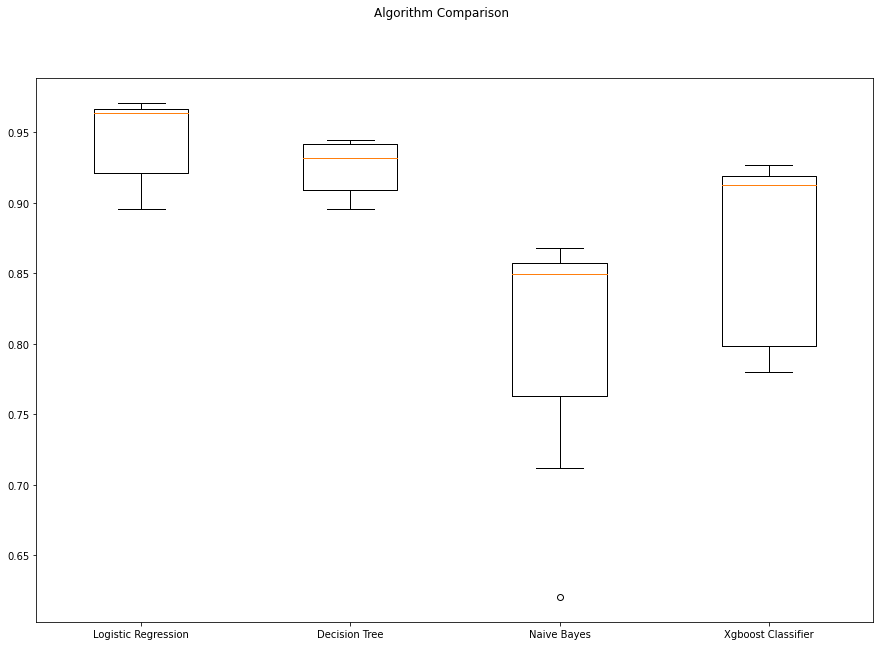

In [75]:
# Boxplot algorithm comparison
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_boxplot)
ax.set_xticklabels(names)
plt.show()